In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
churn_df = pd.read_csv('telecom_churn_clean.csv')
churn_df.head(5)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [13]:
print(X[0], y[0])
print(X[1], y[1])

[45.07 16.78] 0
[27.47 16.62] 0


In [16]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [17]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
X_new = np.array([[56.8, 17.5],  # primeira observação
                  [24.4, 24.1],  # segunda  observação
                  [50.1, 10.9]]) # terceira observação
print(X_new.shape)

(3, 2)


In [ ]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))
#print(f'Predictions: {predictions}')

Predictions: [1 0 0]
Predictions: [1 0 0]


In [29]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [33]:
#import numpy as np
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
print(X_new.shape)

(3, 2)


In [32]:
y_pred = knn.predict(X_new)
print("Predictions: {}".format(predictions)) 

Predictions: [1 0 0]


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.852


In [35]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1, 26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train, y_train)

  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

In [37]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


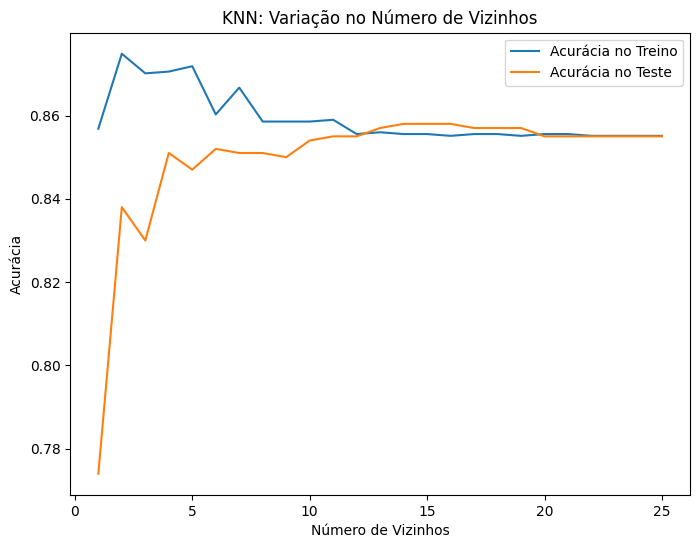

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("KNN: Variação no Número de Vizinhos")

plt.plot(neighbors, train_accuracies.values(), label="Acurácia no Treino")
plt.plot(neighbors, test_accuracies.values(), label="Acurácia no Teste")

plt.legend()
plt.xlabel("Número de Vizinhos")
plt.ylabel("Acurácia")
plt.show()

# Exercicio 1

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Carregar os dados
churn_df = pd.read_csv("telecom_churn_clean.csv")

# Separar X e y
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Criar e treinar o modelo k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Imprimir a acurácia nos dados de teste
print(knn.score(X_test, y_test))


0.8545727136431784


In [2]:
# Separar X e y
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

In [3]:
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
# Criar e treinar o modelo k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Imprimir a acurácia nos dados de teste
print(knn.score(X_test, y_test))


0.8545727136431784


# Exercício 2

In [7]:
# Criar array de vizinhos de 1 a 12
import numpy as np

neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Criar o classificador KNN
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Treinar o modelo com os dados de treino
    knn.fit(X_train, y_train)
  
    # Calcular acurácia no treino e teste
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Exibir os resultados
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.8885971492873218, np.int64(3): 0.8994748687171793, np.int64(4): 0.8750937734433608, np.int64(5): 0.878469617404351, np.int64(6): 0.8660915228807202, np.int64(7): 0.8705926481620405, np.int64(8): 0.8615903975993998, np.int64(9): 0.86384096024006, np.int64(10): 0.858589647411853, np.int64(11): 0.8604651162790697, np.int64(12): 0.8574643660915229} 
 {np.int64(1): 0.7856071964017991, np.int64(2): 0.8470764617691154, np.int64(3): 0.8320839580209896, np.int64(4): 0.856071964017991, np.int64(5): 0.8545727136431784, np.int64(6): 0.8590704647676162, np.int64(7): 0.8605697151424287, np.int64(8): 0.8620689655172413, np.int64(9): 0.863568215892054, np.int64(10): 0.8605697151424287, np.int64(11): 0.8605697151424287, np.int64(12): 0.8605697151424287}


# Exercício 3

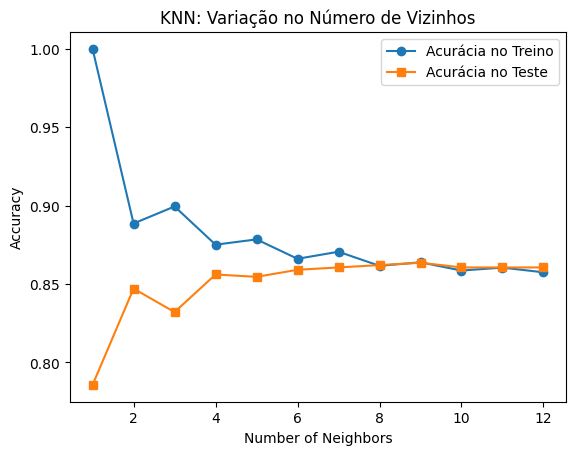

In [9]:
import matplotlib.pyplot as plt

# Adicionar título
plt.title("KNN: Variação no Número de Vizinhos")

# Plotar acurácia no treino
plt.plot(neighbors, list(train_accuracies.values()), label="Acurácia no Treino", marker='o')

# Plotar acurácia no teste
plt.plot(neighbors, list(test_accuracies.values()), label="Acurácia no Teste", marker='s')

# Legenda e eixos
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Exibir o gráfico
plt.show()
